## <span style='color:hotpink' >알파카_캐고수</span>
## <span style = 'color:pink'> 20190220_WED </span>

In [1]:
#데이터 행렬 연산 패키지
import numpy as np
#데이터 구성 패키지
import pandas as pd
#시각화 패키지
import seaborn as sns
import matplotlib
#데이터 시각화 패키지
import matplotlib.pyplot as plt
#통계분석 패키지
import scipy.stats as stats
#선형 모델 패키지
import statsmodels.api as sm
#회귀분석 패키지
from statsmodels.formula.api import ols
#평가함수 패키지
from statsmodels.tools.eval_measures import rmse
#주피터사용시 그래프 자동 출력 옵션
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#데이터 scale
from sklearn.preprocessing import scale


from sklearn import metrics


# 데이터 분할(train, test 데이터 7:3으로 - sklearn의 train_set_split)
from sklearn.model_selection import train_test_split
import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC




import matplotlib.pyplot as plt # 그래프 출력시
import matplotlib as mpl   #그래프 옵션
#그래프 시각화 옵션
%matplotlib inline

#그래프 한글 설정
mpl.rc('font',family = 'NanumBarunGothic')

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 깨질때
mpl.rc("axes",unicode_minus=False)

#100개까지 컬럼 보기
pd.options.display.max_columns = 100

#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)



import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
tk_window = tkinter.Tk()
cwd = os.getcwd()


d = pd.read_csv(askopenfilename(title = "Wow"))

tk_window.destroy()
"""
test = pd.read_csv("/home/pirl/Downloads/data/data/test/201701.csv")

In [3]:
test['date']

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [4]:
test['date(cleaned)'] = pd.to_datetime(test['date'])
test

,Name,date,amount,product,result,date(cleaned)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05
3,Park,2017-01-07,500,cereal,canceled,2017-01-07
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10


In [5]:
test['date(cleaned)'].dt.day
test['date(cleaned)'].dt.month
test['date(cleaned)'].dt.weekday_name


0    Sunday  
1    Tuesday 
2    Thursday
3    Saturday
4    Sunday  
5    Monday  
6    Monday  
7    Tuesday 
Name: date(cleaned), dtype: object

In [6]:
test['date(month)'] = test['date(cleaned)'].dt.month
test['date(day)'] = test['date(cleaned)'].dt.day
test['date(day_of_week)'] = test['date(cleaned)'].dt.weekday_name
test['date(year)'] = test['date(cleaned)'].dt.year

test

,Name,date,amount,product,result,date(cleaned),date(month),date(day),date(day_of_week),date(year)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01,1,1,Sunday,2017
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03,1,3,Tuesday,2017
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05,1,5,Thursday,2017
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,2017
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08,1,8,Sunday,2017
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09,1,9,Monday,2017
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09,1,9,Monday,2017
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10,1,10,Tuesday,2017


## Replace

In [7]:
test['result(cleand)'] = test['result'].replace('confirmed','확인').replace('canceled','취소')
test[['result','result(cleand)']]

,result,result(cleand)
0,confirmed,확인
1,confirmed,확인
2,confirmed,확인
3,canceled,취소
4,confirmed,확인
5,confirmed,확인
6,confirmed,확인
7,canceled,취소


## Apply

In [8]:
def num(data):
    if data == 'apple':
        data = 1
    return data

test['product'].apply(num)

0    1     
1    banana
2    1     
3    cereal
4    kiwi  
5    melon 
6    banana
7    cereal
Name: product, dtype: object

## DATA LOADING

In [9]:
b_d = pd.read_csv("/home/pirl/Downloads/data/data/rental_data/rental_member_data_buisness.csv")
p_d = pd.read_csv("/home/pirl/Downloads/data/data/rental_data/rental_member_data_personal.csv")
etc_d = pd.read_csv("/home/pirl/Downloads/data/data/rental_data/rental_sales_data.csv")

## Buisness

In [10]:
b_d.head()
print(b_d.columns)
b_d.info()
print(b_d.isnull().sum())
#b_d['고객ID'].value_counts() > 1

Index(['고객ID', '고객유형', '생년', '생월', '거주지', '시', '구군', '남여구분'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 8 columns):
고객ID    3590 non-null int64
고객유형    3590 non-null object
생년      1811 non-null float64
생월      1811 non-null float64
거주지     3590 non-null object
시       3589 non-null object
구군      3590 non-null object
남여구분    3590 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 224.5+ KB
고객ID    0   
고객유형    0   
생년      1779
생월      1779
거주지     0   
시       1   
구군      0   
남여구분    0   
dtype: int64


#### 중복되는 ID존재하지 않음

## Personal

In [11]:
#p_d.head()
print(p_d.columns)
p_d.info()
p_d.isnull().sum()

Index(['고객ID', '고객유형', '생년', '생월', '거주지', '시', '구군', '남여구분'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40046 entries, 0 to 40045
Data columns (total 8 columns):
고객ID    40046 non-null int64
고객유형    40046 non-null object
생년      36245 non-null float64
생월      36245 non-null float64
거주지     40045 non-null object
시       40046 non-null object
구군      40046 non-null object
남여구분    40046 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.4+ MB


고객ID    0   
고객유형    0   
생년      3801
생월      3801
거주지     1   
시       0   
구군      0   
남여구분    0   
dtype: int64

## ETC

In [12]:
plt.figure(figsize=(30,20))

etc_d.info()
print(etc_d.columns)
## 중복 존재함
#etc_d['고객ID'].value_counts()
etc_d["계약기간"].max()
print(etc_d['신용등급'].unique().sort())

#etc_d['신용등급'].unique().info()
# 신용 결측치 존재 및 이상치 존재

credit = sorted(etc_d['신용등급'].unique())
print(credit)

#계약유형에 결측치하나 존재
#etc_d['연체건수'].unique()
#유통경로

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51307 entries, 0 to 51306
Data columns (total 15 columns):
고객ID     51307 non-null int64
판매유형     51303 non-null object
계약유형     51306 non-null object
유통경로     51307 non-null object
계약일      51307 non-null object
계약기간     51307 non-null int64
납부유형     51307 non-null object
제품군      51306 non-null object
월랜탈비용    51307 non-null int64
계약상태     51307 non-null object
연체건수     51307 non-null int64
연체여부     51305 non-null object
신용등급     42524 non-null float64
결제은행     48547 non-null object
해약여부     51282 non-null object
dtypes: float64(1), int64(4), object(10)
memory usage: 5.9+ MB
Index(['고객ID', '판매유형', '계약유형', '유통경로', '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용',
       '계약상태', '연체건수', '연체여부', '신용등급', '결제은행', '해약여부'],
      dtype='object')
None
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan, 10.0]


<Figure size 2160x1440 with 0 Axes>

### 판매유형, 계약유형, 제품군, 연체여부, 신용등급, 해약여부에 결측지가 존재하는것으로 보임

## 판매유형

In [161]:
print(etc_d['판매유형'].unique())
sell_type = etc_d[etc_d[['판매유형']].isnull().any(axis=1)]
sell_type

['렌탈' '멤버십' nan]


,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
111,66299293,NaN,교체렌탈,서비스 방문,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상
332,66758867,NaN,일반,홈쇼핑/방송,10-21-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상
51302,66579515,NaN,프로모션,R관리방판,02-03-2015,60,무통장,DES-3A,96900,계약확정,0,없음,NaN,롯데카드,정상
51305,66792778,NaN,일반,렌탈총판,02-03-2015,60,카드이체,DES-1,96900,계약확정,0,없음,2.0,신한카드,정상


#### 다른설명변수들이 다 같을때 판매유형이 무엇이 많았는지 찾아 보겠다.

In [167]:
etc_d[(etc_d["신용등급"] == 2) & (etc_d["제품군"] == "DES-1") & 
      (etc_d["계약유형"]=="교체렌탈") & (etc_d["유통경로"] == "서비스 방문") 
      & (etc_d["납부유형"] == "CMS") & (etc_d["결제은행"] == "농협회원조합")
     & (etc_d["계약상태"] == "계약확정")& (etc_d["월랜탈비용"] == 96900)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
111,66299293,NaN,교체렌탈,서비스 방문,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상
919,66423651,렌탈,교체렌탈,서비스 방문,10-22-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상
2127,66255627,렌탈,교체렌탈,서비스 방문,10-23-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상


#### 고객ID 66299293의 판매유형은 렌탈일 가능성이 가장 높다.

In [166]:
etc_d[(etc_d["신용등급"] == 1) & (etc_d["제품군"] == "DES-1") & 
      (etc_d["계약유형"]=="일반") & (etc_d["유통경로"] == "홈쇼핑/방송") 
      & (etc_d["납부유형"] == "카드이체") & (etc_d["결제은행"] == "삼성카드")
     & (etc_d["계약상태"] == "계약확정")& (etc_d["월랜탈비용"] == 96900)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
332,66758867,NaN,일반,홈쇼핑/방송,10-21-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상
2113,66758982,렌탈,일반,홈쇼핑/방송,10-23-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상
2731,66758834,렌탈,일반,홈쇼핑/방송,10-24-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상


#### 고객ID 66758867의 판매유형은 렌탈일 가능성이 가장 높다.

In [177]:
etc_d[(etc_d["제품군"] == "DES-3A") & 
      (etc_d["계약유형"]=="프로모션")& (etc_d["월랜탈비용"] == 96900)
      & (etc_d["유통경로"] == "R관리방판") 
     & (etc_d["계약상태"] == "계약확정")]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
39238,66789353,렌탈,프로모션,R관리방판,01-10-2015,60,CMS,DES-3A,96900,계약확정,0,없음,7.0,국민은행,정상
39562,66571322,렌탈,프로모션,R관리방판,01-12-2015,60,카드이체,DES-3A,96900,계약확정,0,없음,5.0,국민카드,정상
39593,66790485,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,5.0,국민은행,정상
39672,66496692,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,3.0,농협회원조합,정상
39764,25876424,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,NaN,기업은행,정상
39777,66700145,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,4.0,국민은행,정상
39784,66789526,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,6.0,우리은행,정상
39786,66789529,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,4.0,국민은행,정상
39823,66460568,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,1.0,농협회원조합,정상
39850,66756282,렌탈,프로모션,R관리방판,01-12-2015,60,카드이체,DES-3A,96900,계약확정,0,없음,2.0,롯데카드,정상


#### 고객ID 66792778의 판매유형은 렌탈일 가능성이 가장 높다.

#### 전부 렌탈로 대체할 것이다.

## bar plot

Index(['판매유형', '계약유형', '유통경로', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체여부',
       '신용등급', '결제은행', '해약여부'],
      dtype='object')


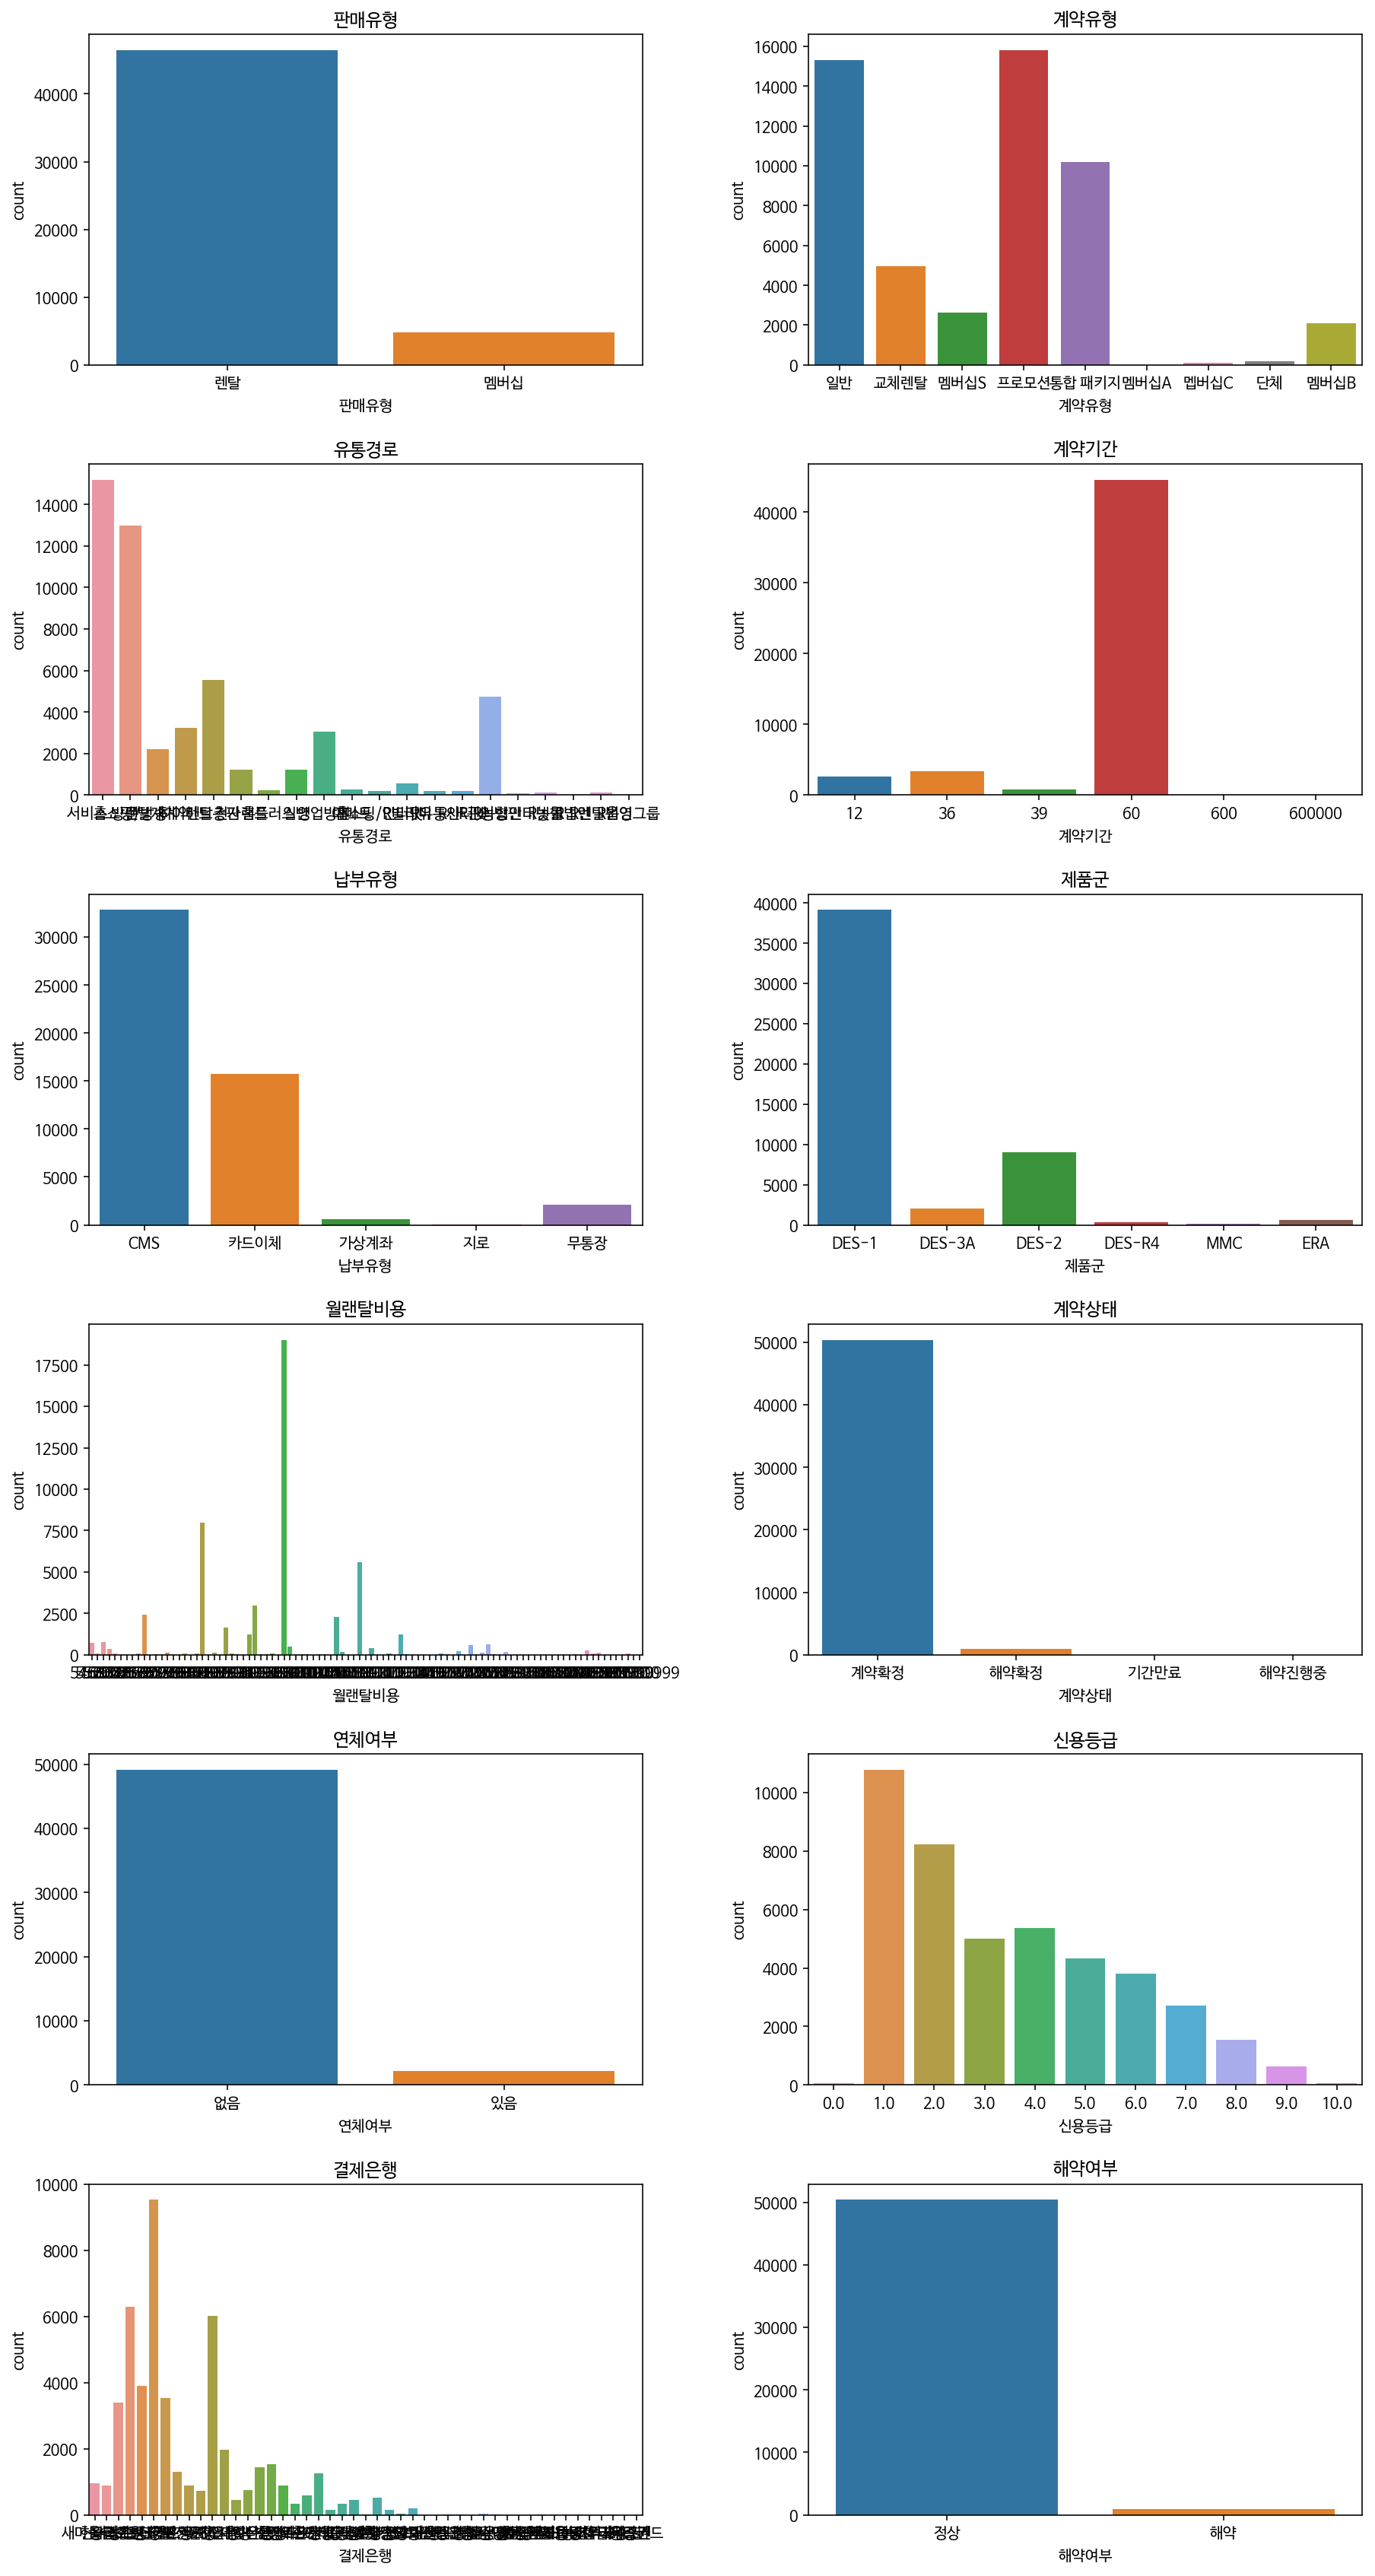

In [133]:
figure,ax = plt.subplots(nrows=6,ncols=2)
figure.set_size_inches(15,30)
figure.subplots_adjust(hspace=0.3,wspace=0.3)
index = etc_d.columns
index = index.drop(["고객ID","계약일","연체건수"])
print(index)

ind=0;
for i in range(6):
    for j in range(2):
        #plt.figure(figsize=(15,10))
        #plt.plot()
        #if((i == 5) & (j == 1)): break;
        ax[i][j].set_title("{}".format(index[ind]))
        sns.countplot(etc_d["{}".format(index[ind])], ax = ax[i][j])
        #ax[i][j].set_xlabel(rotation = 90)
        #ax[i][j].set_xticklabels(rotation=90)
        ind += 1
#plt.show()

## 계약기간

In [29]:
etc_d[(etc_d["계약기간"] >= 600)]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
16,66190995,렌탈,프로모션,홈쇼핑/방송,10-20-2014,600000,카드이체,DES-1,96900,계약확정,0,없음,1.0,롯데카드,정상
25,66755833,렌탈,통합 패키지,전자랜드,10-20-2014,600,CMS,DES-2,89400,계약확정,0,없음,7.0,우체국,정상


#### 계약기간에 보면 600개월과 600000개월이 존재하는데 이상치라고 판단되며, 60을 잘못썻을수도 있다고 생각된다. 600이상의 자료들을 살펴보자

In [28]:
etc_d[(etc_d["월랜탈비용"] == 96900) & (etc_d["제품군"] == "DES-1")].head(10)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
0,66758234,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9.0,새마을금고,정상
2,66756657,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8.0,우리은행,정상
13,66757861,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,1.0,농협중앙회,정상
16,66190995,렌탈,프로모션,홈쇼핑/방송,10-20-2014,600000,카드이체,DES-1,96900,계약확정,0,없음,1.0,롯데카드,정상
22,66758074,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,1.0,농협중앙회,정상
29,66419239,렌탈,교체렌탈,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,NaN,국민은행,정상
33,66758615,렌탈,프로모션,홈플러스,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,7.0,농협중앙회,정상
34,66758778,렌탈,일반,홈쇼핑/방송,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,5.0,우리은행,정상
38,66528773,렌탈,일반,홈쇼핑/방송,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,3.0,국민은행,정상
44,66211709,렌탈,교체렌탈,서비스 방문,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,4.0,농협회원조합,정상


In [35]:
etc_d[(etc_d["월랜탈비용"] == 89400) & (etc_d["제품군"] == "DES-2")].head(10)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
25,66755833,렌탈,통합 패키지,전자랜드,10-20-2014,600,CMS,DES-2,89400,계약확정,0,없음,7.0,우체국,정상
141,66757909,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,4,있음,4.0,신한은행,정상
189,66758580,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,2.0,농협중앙회,정상
211,66758567,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,2.0,농협회원조합,정상
219,66757037,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,1.0,우리은행,정상
271,66758469,렌탈,통합 패키지,일반,10-21-2014,60,카드이체,DES-2,89400,계약확정,0,없음,1.0,롯데카드,정상
312,66758564,렌탈,통합 패키지,영업방판,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,4.0,신한은행,정상
375,66753891,렌탈,통합 패키지,R인터넷,10-21-2014,60,카드이체,DES-2,89400,계약확정,0,없음,4.0,롯데카드,정상
502,66758993,렌탈,통합 패키지,렌탈총판,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,1.0,유안타증권,정상
548,66758318,렌탈,통합 패키지,서비스 방문,10-21-2014,60,카드이체,DES-2,89400,계약확정,0,없음,9.0,신한카드,정상


#### 다수의 고객이 위와 같이 같은 제품을 렌탈했으면 같은 비용을 가졌다. 같은 조건의 고객들은 다 60의 계약기간을 가졌다. 계약기간 600 이상은 60이 잘못 입력된것으로 보인다.

## 신용등급

In [37]:
etc_d["신용등급"].isnull().sum()

8783

In [51]:
etc_d[(etc_d['신용등급'] <= 0) & (etc_d["연체여부"]=="있음")]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
11200,66735871,렌탈,프로모션,홈쇼핑/방송,11-08-2014,60,CMS,DES-1,105900,계약확정,1,있음,0.0,농협회원조합,정상
13747,66768413,렌탈,프로모션,렌탈총판,11-13-2014,60,CMS,DES-1,111900,계약확정,3,있음,0.0,농협회원조합,정상
16292,66625028,렌탈,프로모션,하이마트,11-18-2014,60,CMS,DES-1,96900,계약확정,2,있음,0.0,신한은행,정상


In [55]:
print(etc_d[(etc_d['신용등급'] <= 1)].count())
etc_d[(etc_d['신용등급'] <= 1) & (etc_d["연체여부"] == "있음")].count()

고객ID     10839
판매유형     10838
계약유형     10839
유통경로     10839
계약일      10839
계약기간     10839
납부유형     10839
제품군      10839
월랜탈비용    10839
계약상태     10839
연체건수     10839
연체여부     10838
신용등급     10839
결제은행     10838
해약여부     10837
dtype: int64


고객ID     48
판매유형     48
계약유형     48
유통경로     48
계약일      48
계약기간     48
납부유형     48
제품군      48
월랜탈비용    48
계약상태     48
연체건수     48
연체여부     48
신용등급     48
결제은행     48
해약여부     48
dtype: int64

#### Continuous Variable과 결제은행, 유통경로는 너무 많은 변수들을 가지고 있으며 자세히 살펴 보겠다.

## 월랜탈비용

In [112]:
#etc_d["월랜탈비용"]

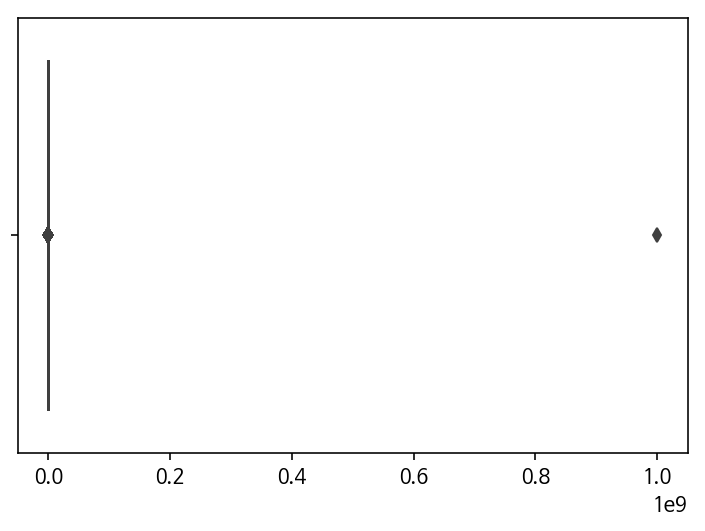

In [71]:
sns.boxplot([etc_d["월랜탈비용"]])

In [66]:
etc_d["월랜탈비용"].describe()

count    5.130700e+04
mean     1.134836e+05
std      4.414418e+06
min      5.460300e+04
25%      8.190000e+04
50%      9.690000e+04
75%      9.840000e+04
max      1.000000e+09
Name: 월랜탈비용, dtype: float64

In [106]:
98400+(((etc_d["월랜탈비용"].quantile(.75))-(etc_d["월랜탈비용"].quantile(0.25)))*8)

230400.0

#### 8*IQR이상부터 이상치라고 판단.

In [107]:
etc_d[etc_d["월랜탈비용"] >= 230400]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
17,66757035,렌탈,프로모션,하이마트,10-20-2014,60,CMS,DES-1,999999999,계약확정,0,없음,4.0,부산은행,정상


#### 같은 조건의 고객을 찾아보겠다.

In [129]:
etc_d[(etc_d["신용등급"] == 4) & (etc_d["제품군"] == "DES-1") & 
      (etc_d["계약유형"]=="프로모션") & (etc_d["유통경로"] == "하이마트") 
      & (etc_d["납부유형"] == "CMS") & (etc_d["결제은행"] == "부산은행")]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
17,66757035,렌탈,프로모션,하이마트,10-20-2014,60,CMS,DES-1,999999999,계약확정,0,없음,4.0,부산은행,정상
15527,66646371,렌탈,프로모션,하이마트,11-17-2014,60,CMS,DES-1,96900,계약확정,0,없음,4.0,부산은행,정상
46317,66795459,렌탈,프로모션,하이마트,01-23-2015,60,CMS,DES-1,96900,계약확정,0,없음,4.0,부산은행,정상


#### 같은 신용등급, 제품, 계약유형, 유통경로, 납부유형, 결제은행일경우 월랜탈비용은 96900원이였는데, 999999999은 96900원일 확률이 높을것으로 판단된다.

In [125]:
etc_d[(etc_d["신용등급"] == 4) & (etc_d["제품군"] == "DES-1") & 
      (etc_d["계약유형"]=="프로모션") & (etc_d["유통경로"] == "하이마트")].월랜탈비용.value_counts()

96900        109
105900       29 
111900       9  
87900        4  
999999999    1  
118200       1  
142200       1  
Name: 월랜탈비용, dtype: int64

## DATA GATHERING

In [ ]:
data = pd.concat([b_d, p_d,etc_d], axis=1, keys=['고객ID'], join='outer')
data.head()

In [ ]:
data = b_d.append(p_d)
data.tail(100)
new = data.append(etc_d)
new.info()

In [ ]:
#index 초기화
data = data.reset_index(drop=True)
data


print(test["amount"].quantile(0.9))
test.sort_values(by="amount",ascending=False).head() #amount로 내림차순
test['product'].unique()

In [ ]:
test['product'].value_counts()

In [ ]:
test[test["amount"] > 200]

In [ ]:
test.isnull().sum()

In [ ]:
sns.distplot(test["amount"])

In [ ]:
sns.countplot(test["product"])